# Prova Parcial



**Dados:**

São dois arquivos csv:

1. dataset_alunos.csv:
    1. household_key: identificador da família
    2. WEEK_NO_BINNED: identificador do intervalo de 12 semanas (aproximadamente 1 trimestre)
    3. SALES_VALUE: total gasto pela família
    4. COUPON_DISCOUNT: total de desconto aplicado pela utilização de cupons promocionais
    5. COUPON_DISC_BOOL: variavel binária correspondente a coluna COUPON_DISCOUNT
2. hh_demog_alunos.csv: contém diversas caracterizações relacionadas a cada família

**Objetivo:**

O objetivo do exercício será montar um modelo para estimar a variável SALES_VALUE no intervalo (84, 96], ou seja da 85a até a 96a semana.

**Métrica:**

Será utilizada a métrica RMSE

**Arquivo a ser submetido (IMPORTANTE):**

Voces deverão submeter o jupyter notebook junto com o arquivo csv `dataset_alunos.csv` trocando o `"alunos"` pelo seu nome conforme se encontra registrado no aluno online (caixa baixa, retirar acentos e substituir espaços por underscore). Seu arquivo de submissão precisa estar no mesmo formato do arquivo de dados, mas com o valor de predição na <br>
Por exemplo:
> nome: João Silva<br>
> arquivo de submissão: `dataset_joao_silva.csv`

**Outros pontos importantes:**

* Exercicio individual a ser entregue até o dia 19/outubro/2021 as 23:59. 
* Alguns alunos poderão ser convocados para uma arguição oral no dia 22/outubro/2021, durante o horário da aula.
* A nota será proporcional ao desempenho do modelo.
* Utilizar somente os algoritmos abordados no curso. 

**Dicas:**
- funções pd.pivot() e/ou pd.pivot_table()
- dtype 'category' do pandas (pesquisar em https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html sobre variaveis com dtype category)

## importação

In [661]:
import pandas as pd
import numpy as np

## dados

In [662]:
data_url = "https://raw.githubusercontent.com/hitoshinagano/data/main/dataset_alunos.csv"
demog_url = "https://raw.githubusercontent.com/hitoshinagano/data/main/hh_demog_alunos.csv"
demog = pd.read_csv(demog_url)
data = pd.read_csv(data_url, dtype = {'WEEK_NO_BINNED':'category'})

## análise exploratória

### * data
1. dataset_alunos.csv:
    1. household_key: identificador da família
    2. WEEK_NO_BINNED: identificador do intervalo de 12 semanas (aproximadamente 1 trimestre)
    3. SALES_VALUE: total gasto pela família
    4. COUPON_DISCOUNT: total de desconto aplicado pela utilização de cupons promocionais
    5. COUPON_DISC_BOOL: variavel binária correspondente a coluna COUPON_DISCOUNT

* demog 
2. hh_demog_alunos.csv: contém diversas caracterizações relacionadas a cada família


In [664]:
data.columns

Index(['household_key', 'WEEK_NO_BINNED', 'SALES_VALUE', 'COUPON_DISC',
       'COUPON_DISC_BOOL'],
      dtype='object')

In [665]:
demog.columns

Index(['AGE_DESC', 'MARITAL_STATUS_CODE', 'INCOME_DESC', 'HOMEOWNER_DESC',
       'HH_COMP_DESC', 'HOUSEHOLD_SIZE_DESC', 'KID_CATEGORY_DESC',
       'household_key'],
      dtype='object')

In [666]:
data.dtypes

household_key          int64
WEEK_NO_BINNED      category
SALES_VALUE          float64
COUPON_DISC          float64
COUPON_DISC_BOOL     float64
dtype: object

In [667]:
demog.dtypes

AGE_DESC               object
MARITAL_STATUS_CODE    object
INCOME_DESC            object
HOMEOWNER_DESC         object
HH_COMP_DESC           object
HOUSEHOLD_SIZE_DESC    object
KID_CATEGORY_DESC      object
household_key           int64
dtype: object

In [668]:
demog

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16
...,...,...,...,...,...,...,...,...
796,35-44,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,2494
797,45-54,A,75-99K,Homeowner,Unknown,3,1,2496
798,45-54,U,35-49K,Unknown,Single Male,1,None/Unknown,2497
799,25-34,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,2498


In [669]:
data

,household_key,WEEK_NO_BINNED,SALES_VALUE,COUPON_DISC,COUPON_DISC_BOOL
0,1,"(0, 12]",119.76,-1.00,1.0
1,1,"(12, 24]",606.74,-6.25,1.0
2,1,"(24, 36]",514.08,-6.20,1.0
3,1,"(36, 48]",487.25,-14.30,1.0
4,1,"(48, 60]",559.91,-23.73,1.0
...,...,...,...,...,...
19995,2500,"(36, 48]",465.42,-20.10,1.0
19996,2500,"(48, 60]",842.95,-14.20,1.0
19997,2500,"(60, 72]",821.08,-10.99,1.0
19998,2500,"(72, 84]",872.85,-9.24,1.0


In [670]:
demog.household_key.duplicated().value_counts

<bound method IndexOpsMixin.value_counts of 0      False
1      False
2      False
3      False
4      False
       ...  
796    False
797    False
798    False
799    False
800    False
Name: household_key, Length: 801, dtype: bool>

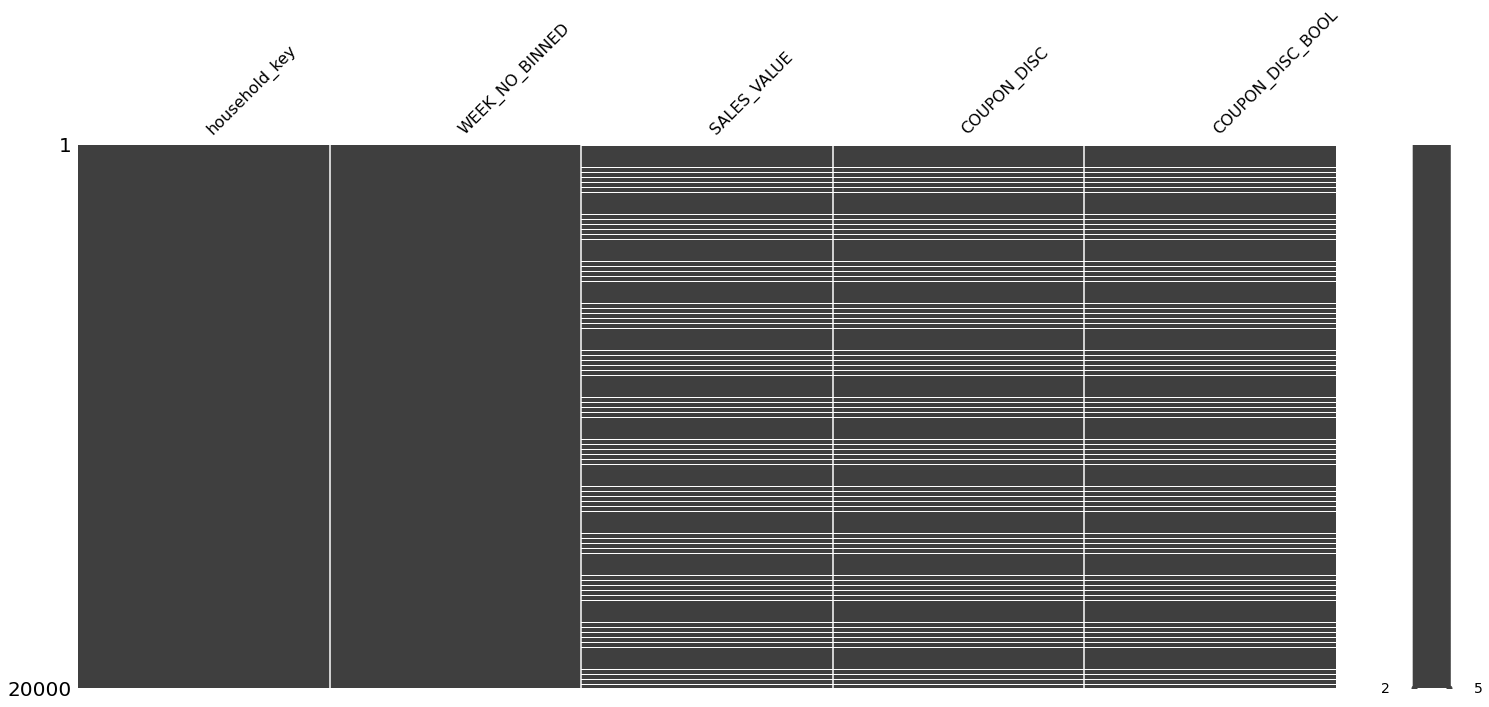

In [671]:
import missingno as nm 
nm.matrix(data)

### Dataframe único



In [672]:
df = pd.merge(data, demog, how = 'left') 

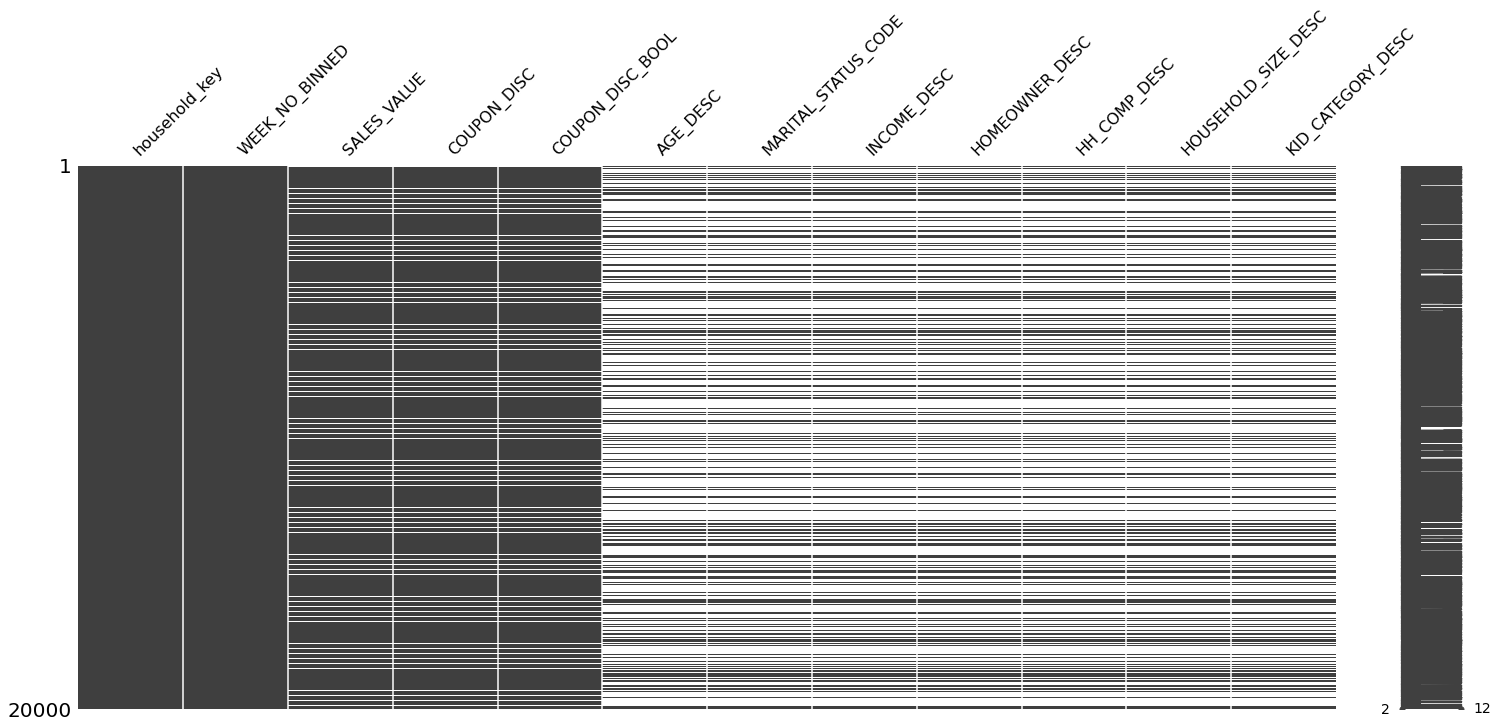

In [673]:
import missingno as nm 
nm.matrix(df)

In [674]:
df['household_key'] = df["household_key"].astype("category")

In [675]:
df.columns

Index(['household_key', 'WEEK_NO_BINNED', 'SALES_VALUE', 'COUPON_DISC',
       'COUPON_DISC_BOOL', 'AGE_DESC', 'MARITAL_STATUS_CODE', 'INCOME_DESC',
       'HOMEOWNER_DESC', 'HH_COMP_DESC', 'HOUSEHOLD_SIZE_DESC',
       'KID_CATEGORY_DESC'],
      dtype='object')

 * Groupby

In [676]:
df.columns

Index(['household_key', 'WEEK_NO_BINNED', 'SALES_VALUE', 'COUPON_DISC',
       'COUPON_DISC_BOOL', 'AGE_DESC', 'MARITAL_STATUS_CODE', 'INCOME_DESC',
       'HOMEOWNER_DESC', 'HH_COMP_DESC', 'HOUSEHOLD_SIZE_DESC',
       'KID_CATEGORY_DESC'],
      dtype='object')

In [677]:
df.groupby('WEEK_NO_BINNED').SALES_VALUE.describe().round(3)

,count,mean,std,min,25%,50%,75%,max
WEEK_NO_BINNED,,,,,,,,
"(0, 12]",2500.0,131.546,235.783,0.0,0.000,35.17,157.182,2333.16
"(12, 24]",2500.0,365.127,417.946,0.0,78.565,232.90,492.333,4147.46
"(24, 36]",2500.0,393.870,477.573,0.0,65.252,239.27,538.412,4566.61
"(36, 48]",2500.0,416.158,490.966,0.0,70.045,250.86,590.138,4448.17
"(48, 60]",2500.0,419.082,502.642,0.0,70.720,254.04,590.818,5528.74
"(60, 72]",2500.0,427.586,498.631,0.0,80.750,263.44,602.993,5749.66
"(72, 84]",2500.0,412.152,490.323,0.0,70.698,246.21,574.622,6712.74
"(84, 96]",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [678]:
df.groupby('household_key').SALES_VALUE.describe().round(3)

,count,mean,std,min,25%,50%,75%,max
household_key,,,,,,,,
1,7.0,480.351,176.520,119.76,454.275,514.08,583.325,653.42
2,7.0,231.656,130.875,0.00,181.885,236.35,313.695,394.08
3,7.0,364.997,317.327,0.00,197.090,271.48,466.530,956.26
4,7.0,154.389,150.472,0.00,42.345,68.00,276.260,375.51
5,7.0,105.120,80.321,0.00,59.545,97.70,150.740,217.57
...,...,...,...,...,...,...,...,...
2496,7.0,515.786,251.156,0.00,498.060,517.87,657.530,781.45
2497,7.0,802.784,412.662,110.51,621.645,798.02,1074.695,1318.28
2498,7.0,302.744,285.075,0.00,43.390,332.19,516.230,667.78


In [679]:
df.groupby('AGE_DESC').SALES_VALUE.describe().round(3)

,count,mean,std,min,25%,50%,75%,max
AGE_DESC,,,,,,,,
19-24,322.0,541.529,486.929,0.0,219.298,453.640,700.718,2665.69
25-34,994.0,616.325,507.077,0.0,252.605,486.615,863.415,2994.46
35-44,1358.0,731.978,607.548,0.0,277.445,581.530,1048.388,3521.49
45-54,2016.0,650.749,582.169,0.0,237.598,517.915,887.418,4592.39
55-64,413.0,569.986,444.539,0.0,276.310,478.250,779.310,2916.29
65+,504.0,492.856,415.269,0.0,217.905,363.940,686.070,2117.30


In [680]:
df.groupby('COUPON_DISC_BOOL').SALES_VALUE.describe().round(3)

,count,mean,std,min,25%,50%,75%,max
COUPON_DISC_BOOL,,,,,,,,
0.0,12132.0,216.267,296.730,0.00,19.153,108.865,296.225,3271.01
1.0,5368.0,706.046,580.404,2.78,294.900,553.070,953.335,6712.74


In [681]:
df.query("household_key == 1813")

,household_key,WEEK_NO_BINNED,SALES_VALUE,COUPON_DISC,COUPON_DISC_BOOL,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC
14496,1813,"(0, 12]",0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14497,1813,"(12, 24]",3.55,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14498,1813,"(24, 36]",0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14499,1813,"(36, 48]",0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14500,1813,"(48, 60]",0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14501,1813,"(60, 72]",0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14502,1813,"(72, 84]",0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14503,1813,"(84, 96]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* pivot_table

In [682]:
df.columns

Index(['household_key', 'WEEK_NO_BINNED', 'SALES_VALUE', 'COUPON_DISC',
       'COUPON_DISC_BOOL', 'AGE_DESC', 'MARITAL_STATUS_CODE', 'INCOME_DESC',
       'HOMEOWNER_DESC', 'HH_COMP_DESC', 'HOUSEHOLD_SIZE_DESC',
       'KID_CATEGORY_DESC'],
      dtype='object')

In [683]:
pd.pivot_table(df,index=['HOMEOWNER_DESC'],values=["SALES_VALUE",'household_key'], 
               aggfunc={"SALES_VALUE":[np.mean,np.std,np.var],"household_key":len})
#retirar

SALES_VALUE                            household_key
                       mean         std            var           len
HOMEOWNER_DESC                                                      
Homeowner        683.532460  592.655353  351240.367015          4032
Probable Owner   556.835065  554.838587  307845.857552            88
Probable Renter  474.585325  365.871488  133861.945536            88
Renter           647.352279  521.474684  271935.845901           336
Unknown          549.046787  454.588993  206651.152472          1864

In [684]:
pd.pivot_table(df,index=['AGE_DESC'],values=["SALES_VALUE",'household_key'], 
               aggfunc={"SALES_VALUE":[np.mean,np.std,np.var],"household_key":len})

SALES_VALUE                            household_key
                mean         std            var           len
AGE_DESC                                                     
19-24     541.528696  486.928734  237099.592223           368
25-34     616.325030  507.076505  257126.581728          1136
35-44     731.977533  607.548389  369115.045161          1552
45-54     650.749122  582.169045  338920.797417          2304
55-64     569.986441  444.539193  197615.093922           472
65+       492.855813  415.268838  172448.207490           576

In [685]:
pd.pivot_table(df,index=['MARITAL_STATUS_CODE'],values=["SALES_VALUE",'household_key'], 
               aggfunc={"SALES_VALUE":[np.mean,np.std,np.var],"household_key":len})
#retirar

SALES_VALUE                            household_key
                           mean         std            var           len
MARITAL_STATUS_CODE                                                     
A                    697.490143  598.451989  358144.783652          2720
B                    576.628620  499.676188  249676.293189           936
U                    599.856059  515.827302  266077.805819          2752

In [686]:
pd.pivot_table(df,index=['INCOME_DESC'],values=["SALES_VALUE",'household_key'], 
               aggfunc={"SALES_VALUE":[np.mean,np.std,np.var],"household_key":len})

SALES_VALUE                            household_key
                    mean         std            var           len
INCOME_DESC                                                      
100-124K      676.355504  520.437542  270855.234739           272
125-149K      900.965000  779.938306  608303.761465           304
15-24K        478.668147  389.366518  151606.285071           592
150-174K      941.684905  701.869424  492620.689032           240
175-199K     1006.389610  958.320539  918378.256288            88
200-249K      612.804286  499.261598  249262.143543            40
25-34K        559.289592  494.401009  244432.357563           616
250K+        1225.235584  825.319857  681152.865867            88
35-49K        545.154352  480.979082  231340.877476          1376
50-74K        647.366071  498.950163  248951.264898          1536
75-99K        649.503095  554.249945  307193.001932           768
Under 15K     638.813208  536.165933  287473.907512           488

In [687]:
pd.pivot_table(df,index=['HH_COMP_DESC'],values=["SALES_VALUE",'household_key'], 
               aggfunc={"SALES_VALUE":[np.mean,np.std,np.var],"household_key":len})

SALES_VALUE                            household_key
                        mean         std            var           len
HH_COMP_DESC                                                         
1 Adult Kids      685.643283  551.685091  304356.439956           376
2 Adults Kids     732.967617  661.979583  438216.968190          1496
2 Adults No Kids  650.244661  540.930205  292605.487002          2040
Single Female     557.433800  459.826279  211440.206768          1152
Single Male       552.789895  518.072034  268398.632124           760
Unknown           590.063112  443.238373  196460.255029           584

In [688]:
pd.pivot_table(df,index=['HOUSEHOLD_SIZE_DESC'],values=["SALES_VALUE",'household_key'], 
               aggfunc={"SALES_VALUE":[np.mean,np.std,np.var],"household_key":len})
# retirar

SALES_VALUE                            household_key
                           mean         std            var           len
HOUSEHOLD_SIZE_DESC                                                     
1                    569.098773  490.199996  240296.036136          2040
2                    633.367296  519.752565  270142.728836          2544
3                    691.218912  619.733228  384069.273497           872
4                    745.849137  602.103444  362528.557528           424
5+                   750.891342  712.887388  508208.427956           528

In [689]:
pd.pivot_table(df,index=['KID_CATEGORY_DESC'],values=["SALES_VALUE",'household_key'], 
               aggfunc={"SALES_VALUE":[np.mean,np.std,np.var],"household_key":len})
#retirar


SALES_VALUE                            household_key
                         mean         std            var           len
KID_CATEGORY_DESC                                                     
1                  670.053446  603.588782  364319.418354           912
2                  762.267690  610.300740  372466.993730           480
3+                 756.192650  706.045284  498499.943090           552
None/Unknown       603.339130  507.630234  257688.454245          4464

### features and target

In [690]:
import seaborn as sns

In [691]:
# target:
y = df.SALES_VALUE.dropna() 
y.shape

(17500,)

In [692]:
# FEATURE ADICIONAL 1 OK
family_mean = []
for i in df.groupby('household_key').SALES_VALUE.mean():   
    family_mean.append(i)
    family_mean.append(i)
    family_mean.append(i)
    family_mean.append(i)
    family_mean.append(i)
    family_mean.append(i)
    family_mean.append(i)
    family_mean.append(i)
df['FAMILY_MEAN']= family_mean

In [693]:
# FEATURE ADICIONAL 2 OK
demog_yes = []
for i in df['AGE_DESC']:
    if type(i) == type(np.NaN):
        demog_yes.append(0)
    else:   
        demog_yes.append(1)
df['DEMOG_yes'] = demog_yes

In [694]:
# FEATURE ADICIONAL 3
frequency = []
for i in df["WEEK_NO_BINNED"]:
    if i == '(0, 12]':
        frequency.append(1)
    elif i == '(12, 24]':
        frequency.append(2)    
    elif i == '(24, 36]':
        frequency.append(3)
    elif i == '(36, 48]':
        frequency.append(4)
    elif i == '(48, 60]':
        frequency.append(5)
    elif i == '(60, 72]':
        frequency.append(6)  
    elif i == '(72, 84]':
        frequency.append(7) 
    else:                    
        frequency.append(8) 
df['FREQUENCY'] = frequency        

In [695]:
corr = df[["SALES_VALUE", 'FAMILY_MEAN','COUPON_DISC_BOOL','COUPON_DISC','FREQUENCY','DEMOG_yes']].corr(); corr

,SALES_VALUE,FAMILY_MEAN,COUPON_DISC_BOOL,COUPON_DISC,FREQUENCY,DEMOG_yes
SALES_VALUE,1.000000,8.334389e-01,0.486690,-0.403512,1.526787e-01,4.015615e-01
FAMILY_MEAN,0.833439,1.000000e+00,0.399195,-0.337084,-1.039105e-18,4.818128e-01
COUPON_DISC_BOOL,0.486690,3.991948e-01,1.000000,-0.446181,1.159854e-01,2.974463e-01
COUPON_DISC,-0.403512,-3.370845e-01,-0.446181,1.000000,-9.049401e-02,-2.089285e-01
FREQUENCY,0.152679,-1.039105e-18,0.115985,-0.090494,1.000000e+00,-2.076766e-20
DEMOG_yes,0.401562,4.818128e-01,0.297446,-0.208928,-2.076766e-20,1.000000e+00


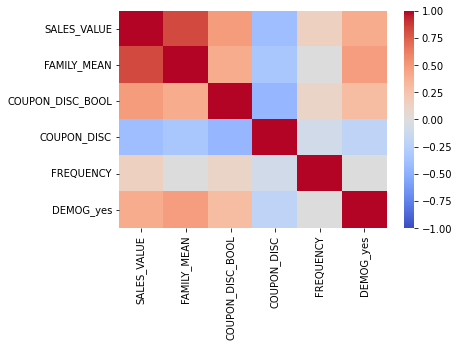

In [696]:
sns.heatmap(corr, cmap = 'coolwarm',   
            vmin = -1, vmax = 1)

In [697]:
# FEATURES APAGADAS 
df = df.drop(['COUPON_DISC','HOMEOWNER_DESC','MARITAL_STATUS_CODE','HOUSEHOLD_SIZE_DESC','KID_CATEGORY_DESC'], axis = 1 )


In [698]:
# FEATURE ADICIONAL DUMMIES
df = pd.get_dummies(data = df, columns = ['AGE_DESC', 'INCOME_DESC', 'HH_COMP_DESC'],
                    drop_first = False, )

In [699]:
df = df.drop(['HH_COMP_DESC_Unknown'], axis = 1 )

In [700]:
df

,household_key,WEEK_NO_BINNED,SALES_VALUE,COUPON_DISC_BOOL,FAMILY_MEAN,DEMOG_yes,FREQUENCY,AGE_DESC_19-24,AGE_DESC_25-34,AGE_DESC_35-44,AGE_DESC_45-54,AGE_DESC_55-64,AGE_DESC_65+,INCOME_DESC_100-124K,INCOME_DESC_125-149K,INCOME_DESC_15-24K,INCOME_DESC_150-174K,INCOME_DESC_175-199K,INCOME_DESC_200-249K,INCOME_DESC_25-34K,INCOME_DESC_250K+,INCOME_DESC_35-49K,INCOME_DESC_50-74K,INCOME_DESC_75-99K,INCOME_DESC_Under 15K,HH_COMP_DESC_1 Adult Kids,HH_COMP_DESC_2 Adults Kids,HH_COMP_DESC_2 Adults No Kids,HH_COMP_DESC_Single Female,HH_COMP_DESC_Single Male
0,1,"(0, 12]",119.76,1.0,480.351429,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,1,"(12, 24]",606.74,1.0,480.351429,1,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,1,"(24, 36]",514.08,1.0,480.351429,1,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,1,"(36, 48]",487.25,1.0,480.351429,1,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,1,"(48, 60]",559.91,1.0,480.351429,1,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2500,"(36, 48]",465.42,1.0,572.662857,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19996,2500,"(48, 60]",842.95,1.0,572.662857,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19997,2500,"(60, 72]",821.08,1.0,572.662857,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19998,2500,"(72, 84]",872.85,1.0,572.662857,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [701]:
df.query("household_key == 2297")

,household_key,WEEK_NO_BINNED,SALES_VALUE,COUPON_DISC_BOOL,FAMILY_MEAN,DEMOG_yes,FREQUENCY,AGE_DESC_19-24,AGE_DESC_25-34,AGE_DESC_35-44,AGE_DESC_45-54,AGE_DESC_55-64,AGE_DESC_65+,INCOME_DESC_100-124K,INCOME_DESC_125-149K,INCOME_DESC_15-24K,INCOME_DESC_150-174K,INCOME_DESC_175-199K,INCOME_DESC_200-249K,INCOME_DESC_25-34K,INCOME_DESC_250K+,INCOME_DESC_35-49K,INCOME_DESC_50-74K,INCOME_DESC_75-99K,INCOME_DESC_Under 15K,HH_COMP_DESC_1 Adult Kids,HH_COMP_DESC_2 Adults Kids,HH_COMP_DESC_2 Adults No Kids,HH_COMP_DESC_Single Female,HH_COMP_DESC_Single Male
18368,2297,"(0, 12]",60.06,0.0,79.21,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18369,2297,"(12, 24]",43.08,0.0,79.21,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18370,2297,"(24, 36]",0.00,0.0,79.21,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18371,2297,"(36, 48]",101.27,0.0,79.21,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18372,2297,"(48, 60]",72.30,0.0,79.21,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18373,2297,"(60, 72]",175.39,0.0,79.21,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18374,2297,"(72, 84]",102.37,0.0,79.21,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18375,2297,"(84, 96]",NaN,NaN,79.21,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


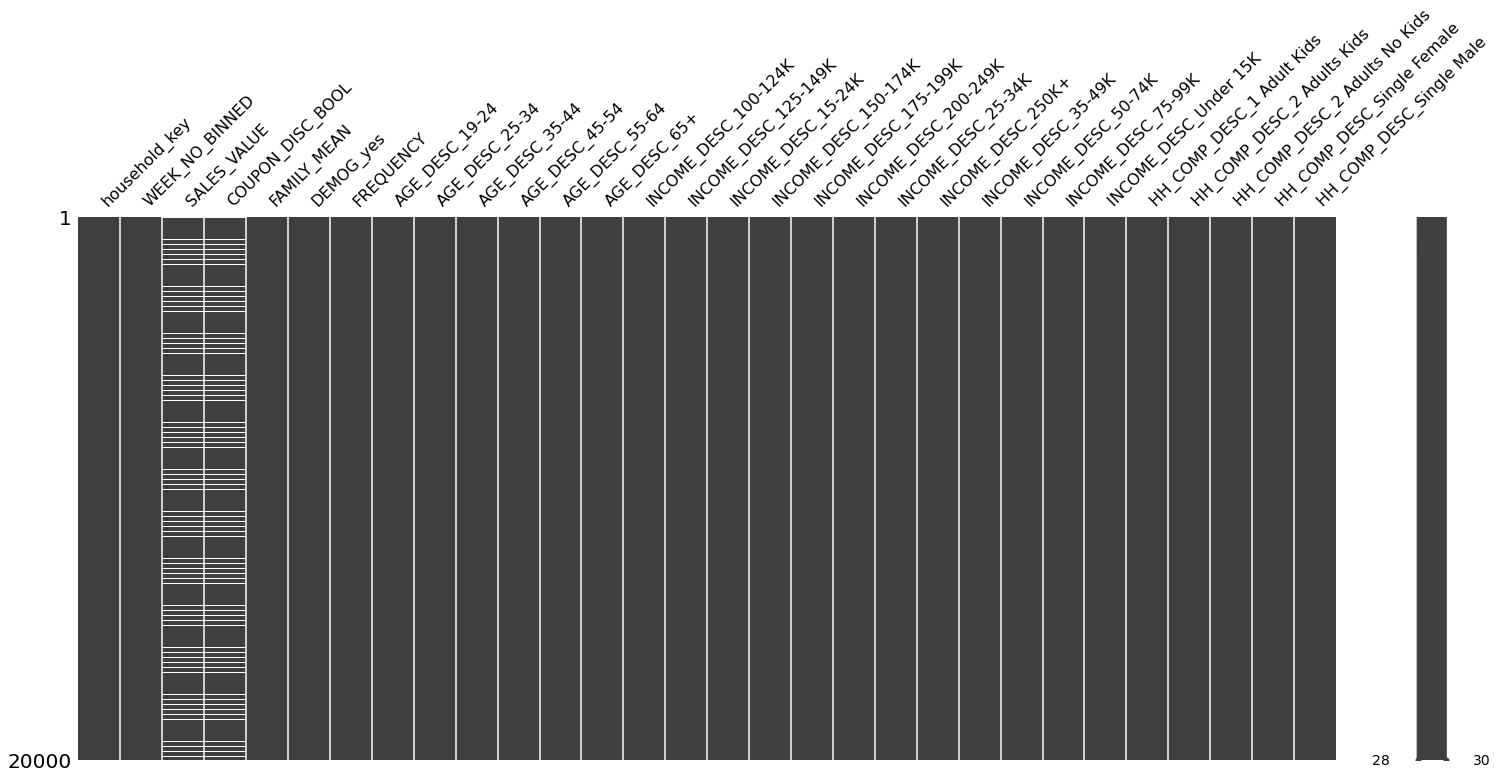

In [702]:
nm.matrix(df)

In [703]:
df.columns

Index(['household_key', 'WEEK_NO_BINNED', 'SALES_VALUE', 'COUPON_DISC_BOOL',
       'FAMILY_MEAN', 'DEMOG_yes', 'FREQUENCY', 'AGE_DESC_19-24',
       'AGE_DESC_25-34', 'AGE_DESC_35-44', 'AGE_DESC_45-54', 'AGE_DESC_55-64',
       'AGE_DESC_65+', 'INCOME_DESC_100-124K', 'INCOME_DESC_125-149K',
       'INCOME_DESC_15-24K', 'INCOME_DESC_150-174K', 'INCOME_DESC_175-199K',
       'INCOME_DESC_200-249K', 'INCOME_DESC_25-34K', 'INCOME_DESC_250K+',
       'INCOME_DESC_35-49K', 'INCOME_DESC_50-74K', 'INCOME_DESC_75-99K',
       'INCOME_DESC_Under 15K', 'HH_COMP_DESC_1 Adult Kids',
       'HH_COMP_DESC_2 Adults Kids', 'HH_COMP_DESC_2 Adults No Kids',
       'HH_COMP_DESC_Single Female', 'HH_COMP_DESC_Single Male'],
      dtype='object')

In [704]:
df['INCOME_DESC_UNDER_50K'] = df['INCOME_DESC_Under 15K'] + df['INCOME_DESC_35-49K'] + df['INCOME_DESC_25-34K'] + df['INCOME_DESC_15-24K']
df['INCOME_DESC_50K+'] = df['INCOME_DESC_75-99K'] + df['INCOME_DESC_50-74K'] + df['INCOME_DESC_250K+'] + df['INCOME_DESC_200-249K'] + df['INCOME_DESC_150-174K'] + df['INCOME_DESC_125-149K'] + df['INCOME_DESC_100-124K'] + df['INCOME_DESC_175-199K']

In [705]:
df['AGE_UNDER_45'] = df['AGE_DESC_19-24']+df['AGE_DESC_25-34']+ df['AGE_DESC_35-44']
df['AGE_ABOVE_45'] = df['AGE_DESC_45-54']+df['AGE_DESC_55-64']+ df['AGE_DESC_65+']

In [706]:
df

,household_key,WEEK_NO_BINNED,SALES_VALUE,COUPON_DISC_BOOL,FAMILY_MEAN,DEMOG_yes,FREQUENCY,AGE_DESC_19-24,AGE_DESC_25-34,AGE_DESC_35-44,AGE_DESC_45-54,AGE_DESC_55-64,AGE_DESC_65+,INCOME_DESC_100-124K,INCOME_DESC_125-149K,INCOME_DESC_15-24K,INCOME_DESC_150-174K,INCOME_DESC_175-199K,INCOME_DESC_200-249K,INCOME_DESC_25-34K,INCOME_DESC_250K+,INCOME_DESC_35-49K,INCOME_DESC_50-74K,INCOME_DESC_75-99K,INCOME_DESC_Under 15K,HH_COMP_DESC_1 Adult Kids,HH_COMP_DESC_2 Adults Kids,HH_COMP_DESC_2 Adults No Kids,HH_COMP_DESC_Single Female,HH_COMP_DESC_Single Male,INCOME_DESC_UNDER_50K,INCOME_DESC_50K+,AGE_UNDER_45,AGE_ABOVE_45
0,1,"(0, 12]",119.76,1.0,480.351429,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
1,1,"(12, 24]",606.74,1.0,480.351429,1,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
2,1,"(24, 36]",514.08,1.0,480.351429,1,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
3,1,"(36, 48]",487.25,1.0,480.351429,1,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
4,1,"(48, 60]",559.91,1.0,480.351429,1,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2500,"(36, 48]",465.42,1.0,572.662857,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19996,2500,"(48, 60]",842.95,1.0,572.662857,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19997,2500,"(60, 72]",821.08,1.0,572.662857,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19998,2500,"(72, 84]",872.85,1.0,572.662857,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [707]:
df = df.drop(['AGE_DESC_19-24',
       'AGE_DESC_25-34', 'AGE_DESC_35-44', 'AGE_DESC_45-54', 'AGE_DESC_55-64',
       'AGE_DESC_65+','INCOME_DESC_100-124K',
       'INCOME_DESC_125-149K', 'INCOME_DESC_15-24K', 'INCOME_DESC_150-174K',
       'INCOME_DESC_175-199K', 'INCOME_DESC_200-249K', 'INCOME_DESC_25-34K',
       'INCOME_DESC_250K+', 'INCOME_DESC_35-49K', 'INCOME_DESC_50-74K',
       'INCOME_DESC_75-99K', 'INCOME_DESC_Under 15K'], axis =1)

In [708]:
X = df.drop(['SALES_VALUE', 'WEEK_NO_BINNED'], axis = 1).dropna()

In [710]:
X = X.drop(['COUPON_DISC_BOOL'], axis = 1)

In [711]:
X.columns

Index(['household_key', 'FAMILY_MEAN', 'DEMOG_yes', 'FREQUENCY',
       'HH_COMP_DESC_1 Adult Kids', 'HH_COMP_DESC_2 Adults Kids',
       'HH_COMP_DESC_2 Adults No Kids', 'HH_COMP_DESC_Single Female',
       'HH_COMP_DESC_Single Male', 'INCOME_DESC_UNDER_50K', 'INCOME_DESC_50K+',
       'AGE_UNDER_45', 'AGE_ABOVE_45'],
      dtype='object')

In [712]:
corr1 = df[['SALES_VALUE','household_key', 'FAMILY_MEAN', 'DEMOG_yes',
       'FREQUENCY', 'HH_COMP_DESC_1 Adult Kids', 'HH_COMP_DESC_2 Adults Kids',
       'HH_COMP_DESC_2 Adults No Kids', 'HH_COMP_DESC_Single Female',
       'HH_COMP_DESC_Single Male', 'INCOME_DESC_UNDER_50K', 'INCOME_DESC_50K+',
       'AGE_UNDER_45', 'AGE_ABOVE_45']].corr(); corr1

,SALES_VALUE,FAMILY_MEAN,DEMOG_yes,FREQUENCY,HH_COMP_DESC_1 Adult Kids,HH_COMP_DESC_2 Adults Kids,HH_COMP_DESC_2 Adults No Kids,HH_COMP_DESC_Single Female,HH_COMP_DESC_Single Male,INCOME_DESC_UNDER_50K,INCOME_DESC_50K+,AGE_UNDER_45,AGE_ABOVE_45
SALES_VALUE,1.000000,8.334389e-01,4.015615e-01,1.526787e-01,9.519183e-02,2.245344e-01,2.060644e-01,1.017156e-01,7.978194e-02,1.684937e-01,3.396696e-01,0.274129,2.376118e-01
FAMILY_MEAN,0.833439,1.000000e+00,4.818128e-01,-1.039105e-18,1.142157e-01,2.694072e-01,2.472460e-01,1.220433e-01,9.572621e-02,2.021668e-01,4.075519e-01,0.328913,2.850980e-01
DEMOG_yes,0.401562,4.818128e-01,1.000000e+00,-2.076766e-20,2.015954e-01,4.141078e-01,4.908427e-01,3.600593e-01,2.894574e-01,6.204235e-01,6.516341e-01,0.618513,6.535087e-01
FREQUENCY,0.152679,-1.039105e-18,-2.076766e-20,1.000000e+00,-6.912173e-20,3.683765e-20,3.202007e-20,2.599631e-21,-4.751738e-20,6.719193e-21,-3.249361e-20,0.000000,-2.594523e-20
HH_COMP_DESC_1 Adult Kids,0.095192,1.142157e-01,2.015954e-01,-6.912173e-20,1.000000e+00,-3.935801e-02,-4.665112e-02,-3.422108e-02,-2.751088e-02,2.187472e-01,4.076740e-02,0.194967,6.404792e-02
HH_COMP_DESC_2 Adults Kids,0.224534,2.694072e-01,4.141078e-01,3.683765e-20,-3.935801e-02,1.000000e+00,-9.582855e-02,-7.029535e-02,-5.651155e-02,1.993683e-01,3.255122e-01,0.377922,1.533045e-01
HH_COMP_DESC_2 Adults No Kids,0.206064,2.472460e-01,4.908427e-01,3.202007e-20,-4.665112e-02,-9.582855e-02,1.000000e+00,-8.332120e-02,-6.698324e-02,2.706344e-01,3.526336e-01,0.224209,3.972386e-01
HH_COMP_DESC_Single Female,0.101716,1.220433e-01,3.600593e-01,2.599631e-21,-3.422108e-02,-7.029535e-02,-8.332120e-02,1.000000e+00,-4.913578e-02,2.994134e-01,1.610973e-01,0.219485,2.384007e-01
HH_COMP_DESC_Single Male,0.079782,9.572621e-02,2.894574e-01,-4.751738e-20,-2.751088e-02,-5.651155e-02,-6.698324e-02,-4.913578e-02,1.000000e+00,2.576668e-01,1.131017e-01,0.188884,1.796739e-01
INCOME_DESC_UNDER_50K,0.168494,2.021668e-01,6.204235e-01,6.719193e-21,2.187472e-01,1.993683e-01,2.706344e-01,2.994134e-01,2.576668e-01,1.000000e+00,-1.906036e-01,0.395669,3.939610e-01


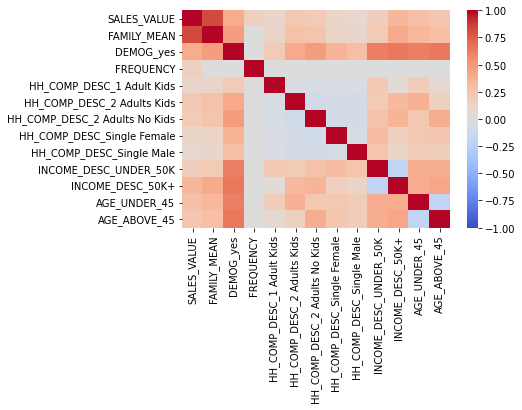

In [713]:
sns.heatmap(corr1, cmap = 'coolwarm',   
            vmin = -1, vmax = 1)

## Modelagem 


### Decision Tree

In [721]:
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text 
tree = DecisionTreeRegressor(max_depth=7)
tree

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

treinamento 

In [722]:
from sklearn.model_selection import train_test_split

In [723]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [724]:
print('X_train =', X_train.shape)
print('X_test =',X_test.shape)
print('y_train =',y_train.shape)
print('y_test =',y_test.shape)

X_train = (13125, 13)
X_test = (4375, 13)
y_train = (13125,)
y_test = (4375,)


In [725]:
tree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

teste

In [726]:
y_pred = tree.predict(X_test)

In [727]:
print(len(y_pred))
print(len(y_test))

4375
4375


### Métrica

In [728]:
y_pred = pd.DataFrame(y_pred).set_index(y_test.index)

In [729]:
comparaçao = pd.concat([y_test, y_pred], axis = 1).rename(columns = {'SALES_VALUE': 'true', 0: 'pred'}); comparaçao

,true,pred
14712,0.00,60.489843
5505,16.33,7.378526
1881,276.86,205.681637
5182,251.04,174.215088
4886,473.96,242.438132
...,...,...
13492,488.31,499.912284
9089,302.67,270.439543
6733,1089.02,1014.911848
16608,0.00,47.536420


In [730]:
print('LEAVES: ',tree.get_n_leaves())
print('DEPTH: ',tree.get_depth())

LEAVES:  117
DEPTH:  7


In [731]:
tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 7,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [732]:
from sklearn.metrics import mean_squared_error

In [733]:
mean_squared_error(y_test, y_pred)

47976.33588514675

In [734]:
np.sqrt(mean_squared_error(y_test, y_pred))
# = RAIZ (mse = np.mean((y - y_pred) ** 2)

219.03501063790407

In [735]:
tree.score(X_test,y_test)

0.7632668076383773

## Predição

In [736]:
df

,household_key,WEEK_NO_BINNED,SALES_VALUE,COUPON_DISC_BOOL,FAMILY_MEAN,DEMOG_yes,FREQUENCY,HH_COMP_DESC_1 Adult Kids,HH_COMP_DESC_2 Adults Kids,HH_COMP_DESC_2 Adults No Kids,HH_COMP_DESC_Single Female,HH_COMP_DESC_Single Male,INCOME_DESC_UNDER_50K,INCOME_DESC_50K+,AGE_UNDER_45,AGE_ABOVE_45
0,1,"(0, 12]",119.76,1.0,480.351429,1,1,0,0,1,0,0,1,0,0,1
1,1,"(12, 24]",606.74,1.0,480.351429,1,2,0,0,1,0,0,1,0,0,1
2,1,"(24, 36]",514.08,1.0,480.351429,1,3,0,0,1,0,0,1,0,0,1
3,1,"(36, 48]",487.25,1.0,480.351429,1,4,0,0,1,0,0,1,0,0,1
4,1,"(48, 60]",559.91,1.0,480.351429,1,5,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2500,"(36, 48]",465.42,1.0,572.662857,0,4,0,0,0,0,0,0,0,0,0
19996,2500,"(48, 60]",842.95,1.0,572.662857,0,5,0,0,0,0,0,0,0,0,0
19997,2500,"(60, 72]",821.08,1.0,572.662857,0,6,0,0,0,0,0,0,0,0,0
19998,2500,"(72, 84]",872.85,1.0,572.662857,0,7,0,0,0,0,0,0,0,0,0


In [737]:
new_df = df[df.isna().any(axis=1)];new_df

,household_key,WEEK_NO_BINNED,SALES_VALUE,COUPON_DISC_BOOL,FAMILY_MEAN,DEMOG_yes,FREQUENCY,HH_COMP_DESC_1 Adult Kids,HH_COMP_DESC_2 Adults Kids,HH_COMP_DESC_2 Adults No Kids,HH_COMP_DESC_Single Female,HH_COMP_DESC_Single Male,INCOME_DESC_UNDER_50K,INCOME_DESC_50K+,AGE_UNDER_45,AGE_ABOVE_45
7,1,"(84, 96]",NaN,NaN,480.351429,1,8,0,0,1,0,0,1,0,0,1
15,2,"(84, 96]",NaN,NaN,231.655714,0,8,0,0,0,0,0,0,0,0,0
23,3,"(84, 96]",NaN,NaN,364.997143,0,8,0,0,0,0,0,0,0,0,0
31,4,"(84, 96]",NaN,NaN,154.388571,0,8,0,0,0,0,0,0,0,0,0
39,5,"(84, 96]",NaN,NaN,105.120000,0,8,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19967,2496,"(84, 96]",NaN,NaN,515.785714,1,8,0,0,0,0,0,0,1,0,1
19975,2497,"(84, 96]",NaN,NaN,802.784286,1,8,0,0,0,0,1,1,0,0,1
19983,2498,"(84, 96]",NaN,NaN,302.744286,1,8,0,0,1,0,0,0,1,1,0
19991,2499,"(84, 96]",NaN,NaN,362.551429,1,8,0,1,0,0,0,1,0,1,0


In [740]:
X_valor = new_df.drop(['SALES_VALUE','WEEK_NO_BINNED','COUPON_DISC_BOOL'], axis=1)

In [831]:
Y_valor = tree.predict(X_valor)

In [834]:
X_valor.index

Int64Index([    7,    15,    23,    31,    39,    47,    55,    63,    71,
               79,
            ...
            19927, 19935, 19943, 19951, 19959, 19967, 19975, 19983, 19991,
            19999],
           dtype='int64', length=2500)

In [852]:
Y_valor

array([621.89381818, 303.51737226, 420.5268232 , ..., 322.81027079,
       420.5268232 , 661.06888889])

In [853]:
Y_valor = pd.DataFrame(Y_valor).set_index(X_valor.index).rename(columns = {0: 'SALES_VALUE'})

In [854]:
Y_valor['WEEK_NO_BINNED'] = ['(84, 96]']*2500

In [855]:
Y_valor['household_key'] = list(range(1,2501))

In [856]:
Y_valor = Y_valor.reindex(columns=['household_key','WEEK_NO_BINNED','SALES_VALUE'])
Y_valor

,household_key,WEEK_NO_BINNED,SALES_VALUE
7,1,"(84, 96]",621.893818
15,2,"(84, 96]",303.517372
23,3,"(84, 96]",420.526823
31,4,"(84, 96]",146.470588
39,5,"(84, 96]",118.893341
...,...,...,...
19967,2496,"(84, 96]",596.628353
19975,2497,"(84, 96]",941.552093
19983,2498,"(84, 96]",322.810271
19991,2499,"(84, 96]",420.526823


In [845]:
new_data = data.dropna()

In [846]:
new_data.head(20)

,household_key,WEEK_NO_BINNED,SALES_VALUE,COUPON_DISC,COUPON_DISC_BOOL
0,1,"(0, 12]",119.76,-1.00,1.0
1,1,"(12, 24]",606.74,-6.25,1.0
2,1,"(24, 36]",514.08,-6.20,1.0
3,1,"(36, 48]",487.25,-14.30,1.0
4,1,"(48, 60]",559.91,-23.73,1.0
5,1,"(60, 72]",653.42,-12.70,1.0
6,1,"(72, 84]",421.30,-1.50,1.0
8,2,"(0, 12]",0.00,0.00,0.0
9,2,"(12, 24]",394.08,-5.00,1.0
10,2,"(24, 36]",276.54,0.00,0.0


In [869]:
a = pd.concat([new_data,Y_valor]).sort_index()

In [874]:
a.sample(25)

,household_key,WEEK_NO_BINNED,SALES_VALUE,COUPON_DISC,COUPON_DISC_BOOL
10052,1257,"(48, 60]",0.00000,0.00,0.0
13622,1703,"(72, 84]",928.76000,0.00,0.0
11292,1412,"(48, 60]",674.41000,-0.75,1.0
15694,1962,"(72, 84]",816.18000,-3.00,1.0
7407,926,"(84, 96]",1113.89024,NaN,NaN
5397,675,"(60, 72]",934.38000,-0.50,1.0
12221,1528,"(60, 72]",1060.69000,-2.98,1.0
14507,1814,"(36, 48]",818.90000,0.00,0.0
16744,2094,"(0, 12]",191.08000,0.00,0.0
3324,416,"(48, 60]",373.29000,-0.55,1.0


In [881]:
a.to_csv('dataset_vinicius_mota.csv')

In [882]:
data

,household_key,WEEK_NO_BINNED,SALES_VALUE,COUPON_DISC,COUPON_DISC_BOOL
0,1,"(0, 12]",119.76,-1.00,1.0
1,1,"(12, 24]",606.74,-6.25,1.0
2,1,"(24, 36]",514.08,-6.20,1.0
3,1,"(36, 48]",487.25,-14.30,1.0
4,1,"(48, 60]",559.91,-23.73,1.0
...,...,...,...,...,...
19995,2500,"(36, 48]",465.42,-20.10,1.0
19996,2500,"(48, 60]",842.95,-14.20,1.0
19997,2500,"(60, 72]",821.08,-10.99,1.0
19998,2500,"(72, 84]",872.85,-9.24,1.0
